# Аналитика в авиакомпании

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

### Аналитика средствами Python

### Описание данных

#### Таблица /datasets/query_1.csv:   
-model — модели самолета;  
-flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года  

#### Таблица /datasets/query_3.csv:  
city — города;  
average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

### План выполнения:  
1. Импортируем файлы;  
2. Изучим данные в них и проверим типы данных на корректность;  
3. Выберем топ-10 городов по количеству рейсов;  
4. Построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;  
5. Сделаем выводы по каждому из графиков, поясним результат.

#### 1. Импортируем файлы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    aircraft_data = pd.read_csv('/datasets/query_1.csv')
    city_data = pd.read_csv('/datasets/query_3.csv')

except:
    aircraft_data = pd.read_csv('query_1.csv')
    city_data = pd.read_csv('query_3.csv')


#### 2. Изучим данные в файлах и проверим типы данных на корректность.

In [3]:
aircraft_data.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
aircraft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


В данных Aircraft отсутствуют пропуски. Типы данных верные: model - текстовый формат, flights_amount - целочисленный. 

In [5]:
city_data.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В данных City отсутствуют пропуски. Типы данных верные: city - текстовый формат, average_flights - числа с плавающей точкой.

#### 3. Выберем топ-10 городов по количеству рейсов

Найдем общее кол-во рейсов в Августе. 

In [7]:
city_data['flights_amount'] = city_data['average_flights']*31


In [8]:
city_data.head()

,city,average_flights,flights_amount
0,Абакан,3.870968,120.0
1,Анадырь,1.000000,31.0
2,Анапа,2.161290,67.0
3,Архангельск,5.354839,166.0
4,Астрахань,2.451613,76.0


In [9]:
city_data.sort_values(by='flights_amount', ascending=False).head(10)

,city,average_flights,flights_amount
43,Москва,129.774194,4023.0
70,Санкт-Петербург,31.161290,966.0
54,Новосибирск,17.322581,537.0
33,Красноярск,11.580645,359.0
20,Екатеринбург,11.322581,351.0
67,Ростов-на-Дону,10.193548,316.0
63,Пермь,10.129032,314.0
10,Брянск,10.000000,310.0
74,Сочи,9.612903,298.0
84,Ульяновск,9.580645,297.0


Максимальное количество рейсов осуществляется из Москвы, далее идут Санкт-Петербург и Новосибирск. 

#### 4. Построим графики и сделаем выводы.

График модели самолетов и кол-ва рейсов. 

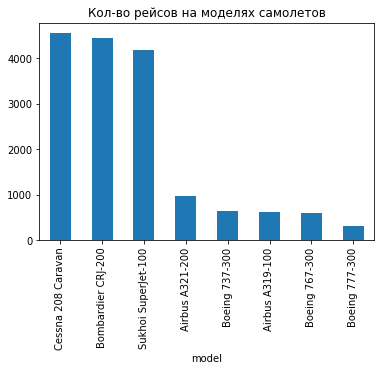

In [10]:
aircraft_data.sort_values(by='flights_amount', ascending=False).plot(kind='bar', x='model', y='flights_amount', title = 'Кол-во рейсов на моделях самолетов', legend=False)

Наибольшее кол-во рейсов осуществляется на моделях Cessna 208 Caravan, меньше всего рейсов - на Boeing 777-300.

График городов и кол-ва рейсов 

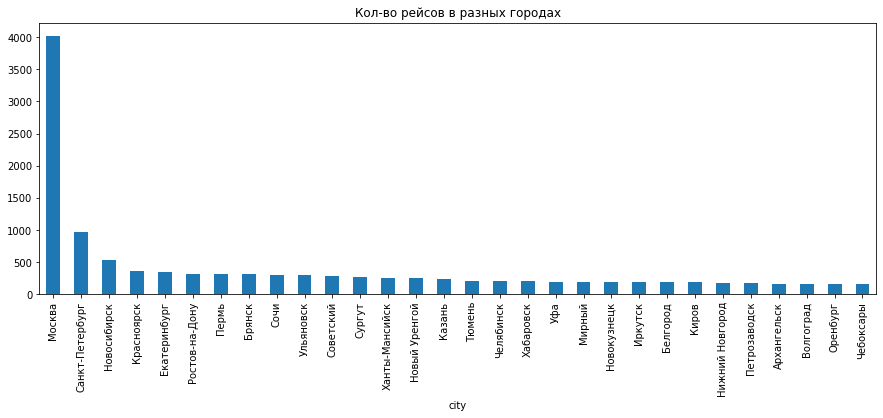

In [11]:
city_data.sort_values(by='flights_amount', ascending=False).head(30).plot(kind='bar', x='city', y='flights_amount', title = 'Кол-во рейсов в разных городах', legend=False, figsize=(15,5))

Максимальное количество рейсов осуществляется из Москвы, далее идут Санкт-Петербург и Новосибирск. 

График Топ-10 городов и количества рейсов. 

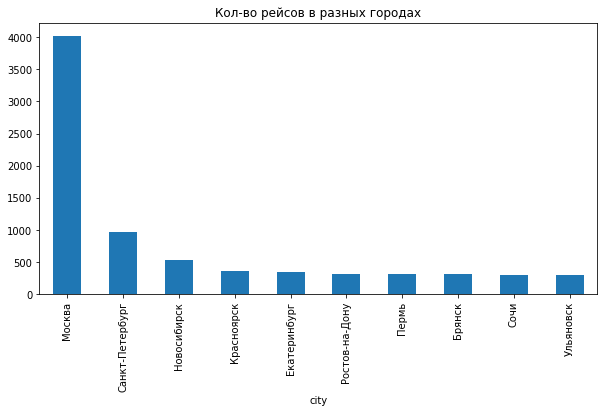

In [12]:
city_data.sort_values(by='flights_amount', ascending=False).head(10).plot(kind='bar', x='city', y='flights_amount', title = 'Кол-во рейсов в разных городах', legend=False, figsize=(10,5))